In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import geopandas as gpd
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')
import bills

In [4]:
df = bills.list_bills()
df

,session,ld,amendment,text,ld_ext,file
0,131,728,None,[Printed on recycled paper131st MAINE LEGISLAT...,131-LD-0728,131-LD-0728.txt
1,131,1565,None,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-1565,131-LD-1565.txt
2,131,340,None,[Printed on recycled paper131st MAINE LEGISLAT...,131-LD-0340,131-LD-0340.txt
3,131,978,SA_A_S0059,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-0978-SA_A_S0059,131-LD-0978-SA_A_S0059.txt
4,131,810,None,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-0810,131-LD-0810.txt
...,...,...,...,...,...,...
3247,131,2016,None,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-2016,131-LD-2016.txt
3248,131,398,None,[Printed on recycled paper131st MAINE LEGISLAT...,131-LD-0398,131-LD-0398.txt
3249,131,1402,None,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-1402,131-LD-1402.txt
3250,131,31,None,[Printed on recycled paper131st MAINE LEGISLAT...,131-LD-0031,131-LD-0031.txt


In [5]:
bills.get_bill_attr(2)

'An Act to Address Chronic Homelessness by Creating the Housing First Fund'

In [6]:
df["title"] = df["ld"].astype(int).progress_apply(bills.get_bill_attr)

  0%|          | 0/3252 [00:00<?, ?it/s]

In [7]:
df.head()

,session,ld,amendment,text,ld_ext,file,title
0,131,728,None,[Printed on recycled paper131st MAINE LEGISLAT...,131-LD-0728,131-LD-0728.txt,An Act to Amend the Bag Limit for Turkey
1,131,1565,None,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-1565,131-LD-1565.txt,"Resolve, to Establish a Pilot Program to Provi..."
2,131,340,None,[Printed on recycled paper131st MAINE LEGISLAT...,131-LD-0340,131-LD-0340.txt,An Act Regarding the Purpose and Responsibilit...
3,131,978,SA_A_S0059,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-0978-SA_A_S0059,131-LD-0978-SA_A_S0059.txt,An Act to Maintain Legislative Oversight of th...
4,131,810,None,"[ \n, MAINE STATE LEGISLATURE \n, \n, \n, ...",131-LD-0810,131-LD-0810.txt,An Act to Create the Maine Family First Employ...


In [8]:
df2 = bills.list_testimony()
df2.head()

,ld,name,organization,text,file
0,1334,Malory Shaughnessy,Alliance for Addiction and Mental Health Services,"[295 Water Street, Suite 307, Augusta ME 04330...",../data/131/testimony/131-LD-1334/Malory Shaug...
1,1334,Sawin Millett,Maine State Legislature,"[HOUSE OF REPRESENTATIVES \n, £3 _, 2 STATE HO...",../data/131/testimony/131-LD-1334/Sawin Millet...
2,1334,John Stephen,AmeriHealth Caritas,"[ \n, 1 \n, \n, \n, Testimony of John Stephe...",../data/131/testimony/131-LD-1334/John Stephen...
3,1334,Sarah Geiger,America_s Health Insurance Plans,"[“ 601 Pennsylvania Avenue, NW T 202.778.3200 ...",../data/131/testimony/131-LD-1334/Sarah Geiger...
4,1334,Kimberly Cook,Community Health Options,"[ \n, \n, Testimony in support of \n, LD 133...",../data/131/testimony/131-LD-1334/Kimberly Coo...
...,...,...,...,...,...
25148,1254,Alexander Mayer,Brunswick,"[Alexander Mayer, MD \n, Plastic and Reconstru...",../data/131/testimony/131-LD-1254/Alexander Ma...
25149,1254,Poppy Arford,Maine State Legislature,"[,, HoUSE or REPRESENTATIVES \n, 2 STATE HOUSE...",../data/131/testimony/131-LD-1254/Poppy Arford...
25150,1254,Laura Tracy,Augusta,"[L.D. 1254 \n, An Act to Provide Coverage and...",../data/131/testimony/131-LD-1254/Laura Tracy ...
25151,1254,Lisa Harvey-McPherson,Northern Light Health,"[northernlighthealth.org\n, This institution i...",../data/131/testimony/131-LD-1254/Lisa Harvey-...


In [20]:
df2["billTitle"] = pd.merge(df2, df[df["amendment"].isnull()], how="left", on="ld")["title"]
df2.head()

,ld,name,organization,text,file,billTitle,town,type,label
0,1334,Malory Shaughnessy,Alliance for Addiction and Mental Health Services,"[295 Water Street, Suite 307, Augusta ME 04330...",../data/131/testimony/131-LD-1334/Malory Shaug...,An Act to Establish a Managed Care Program for...,None,organization,Alliance for Addiction and Mental Health Services
1,1334,Sawin Millett,Maine State Legislature,"[HOUSE OF REPRESENTATIVES \n, £3 _, 2 STATE HO...",../data/131/testimony/131-LD-1334/Sawin Millet...,An Act to Establish a Managed Care Program for...,None,organization,Maine State Legislature
2,1334,John Stephen,AmeriHealth Caritas,"[ \n, 1 \n, \n, \n, Testimony of John Stephe...",../data/131/testimony/131-LD-1334/John Stephen...,An Act to Establish a Managed Care Program for...,None,organization,AmeriHealth Caritas
3,1334,Sarah Geiger,America_s Health Insurance Plans,"[“ 601 Pennsylvania Avenue, NW T 202.778.3200 ...",../data/131/testimony/131-LD-1334/Sarah Geiger...,An Act to Establish a Managed Care Program for...,None,organization,America_s Health Insurance Plans
4,1334,Kimberly Cook,Community Health Options,"[ \n, \n, Testimony in support of \n, LD 133...",../data/131/testimony/131-LD-1334/Kimberly Coo...,An Act to Establish a Managed Care Program for...,None,organization,Community Health Options


In [10]:
df2["town"] = df2["organization"].progress_apply(bills.fuzzy_match_towns)

  0%|          | 0/25153 [00:00<?, ?it/s]

In [11]:
df2["type"] = df2["town"].isnull().apply(lambda x: "organization" if x else "individual")
df2["label"] = df2.apply(lambda x: x["organization"] if x["type"] == "organization" else x["name"], axis=1)

In [85]:
df2["subjects"] = df2["ld"].apply(bills.get_bill_attr, attr="subjects").apply(lambda l: [s["subject_name"] for s in l])

Text(0, 0.5, '')

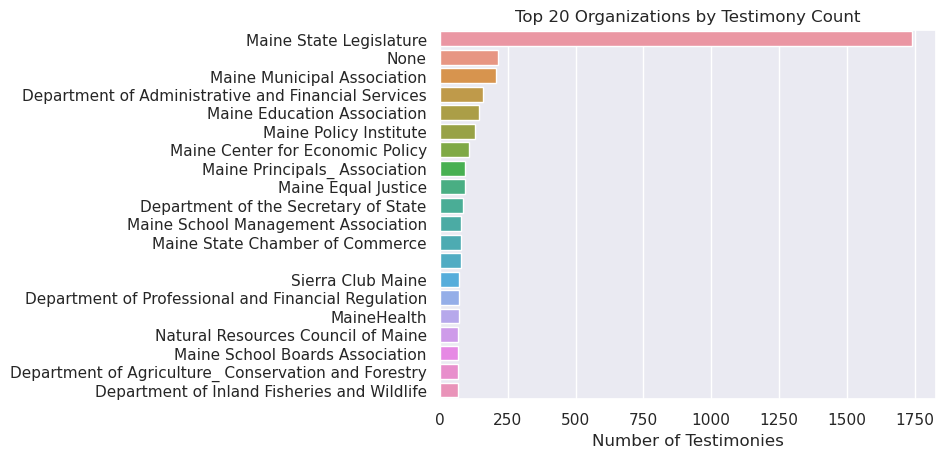

In [12]:
top_orgs = df2[df2["type"]=="organization"].groupby("organization")["ld"].count().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_orgs.values, y=top_orgs.index)
ax.set_title("Top 20 Organizations by Testimony Count")
ax.set_xlabel("Number of Testimonies")
ax.set_ylabel(None)

Text(0, 0.5, '')

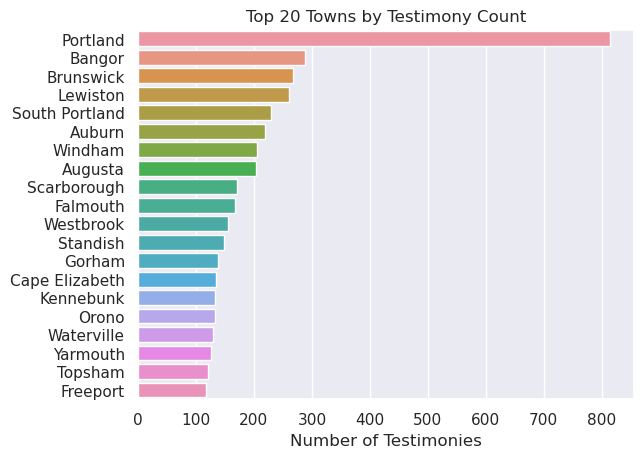

In [13]:
top_towns = df2[df2["type"]=="individual"].groupby("organization")["ld"].count().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_towns.values, y=top_towns.index)
ax.set_title("Top 20 Towns by Testimony Count")
ax.set_xlabel("Number of Testimonies")
ax.set_ylabel("")

Text(0, 0.5, '')

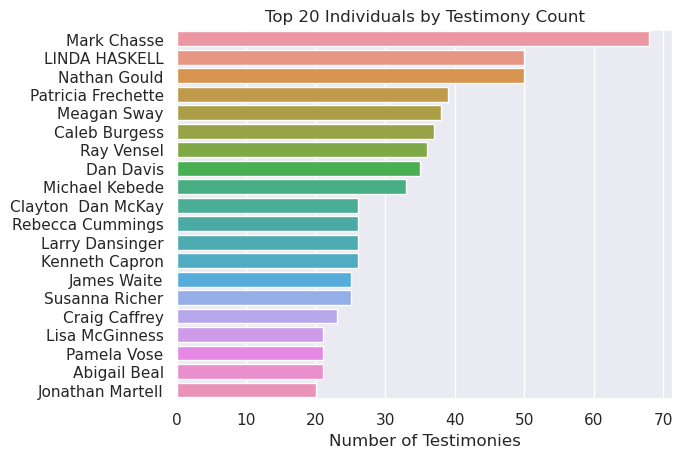

In [14]:
top_indivs = df2[df2["type"]=="individual"].groupby("name")["ld"].count().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_indivs.values, y=top_indivs.index)
ax.set_title("Top 20 Individuals by Testimony Count")
ax.set_xlabel("Number of Testimonies")
ax.set_ylabel("")

Text(0, 0.5, '')

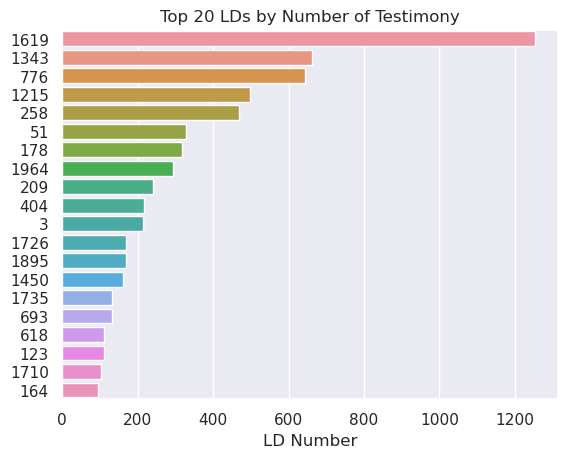

In [26]:
top_lds = df2.groupby("ld")["label"].count().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_lds.values, y=top_lds.index.astype(str), orient="h")
ax.set_title("Top 20 LDs by Number of Testimony")
ax.set_xlabel("LD Number")
ax.set_ylabel("")

In [76]:
# convert the subject column to a tidy dataframe list
subjects = df2.explode("subjects").dropna(subset=["subjects"])
subjects["subject"] = subjects["subjects"].apply(lambda x: x["subject_name"] if x else None)

Text(0, 0.5, '')

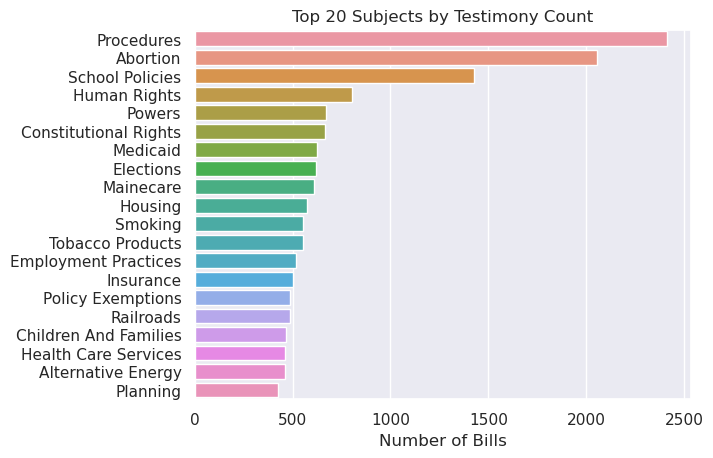

In [78]:
top_subjects = subjects.groupby("subject")["label"].count().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_subjects.values, y=top_subjects.index.astype(str), orient="h")
ax.set_title("Top 20 Subjects by Testimony Count")
ax.set_xlabel("Number of Bills")
ax.set_ylabel("")

In [94]:
G = nx.Graph()
nodes_from = df2["label"].dropna().unique()
nodes_to = df2["ld"].dropna().unique()
G.add_nodes_from(nodes_from, bipartite="Author")
G.add_nodes_from(nodes_to, bipartite="Bill", title=df2.groupby("ld").first()["billTitle"].to_dict(), subjects=df2.groupby("ld").first()["subjects"].to_dict())
G.add_edges_from(df2[["label", "ld"]].dropna().to_records(index=False))

In [80]:
nx.write_gexf(G, "full_graph_bipartite.gexf")

In [178]:
top_subjects = df2.groupby("ld").first()["subjects"].explode().value_counts()

In [163]:
title_dict = df2.groupby("ld").first()["billTitle"].to_dict()
subjects_dict = df2.groupby("ld").first()["subjects"].iloc[0].to_dict()
bill_attrs_dict = {i:{"title":title_dict[i], "subject":subjects_dict[i],"LD Number":i} for i in nodes_to}

AttributeError: 'list' object has no attribute 'to_dict'

In [155]:
G = nx.Graph()
nodes_from = df2["label"].dropna().unique()
nodes_to = df2.groupby("ld")["label"].count().sort_values(ascending=False).head(100).index.to_list()
G.add_nodes_from(
    nodes_to, 
    bipartite="Bill"
    )
nx.set_node_attributes(G, bill_attrs_dict)
G.add_nodes_from(nodes_from, bipartite="Author")
G.add_edges_from(df2[df2["ld"].isin(nodes_to)][["label", "ld"]].dropna().to_records(index=False))

In [162]:
bill_attrs_dict[1619]

{'title': "An Act to Improve Maine's Reproductive Privacy Laws",
 'subject': ['Abortion', 'Procedures'],
 'LD Number': 1619}

In [137]:
B = bipartite.weighted_projected_graph(G, nodes_to)

In [144]:
B.nodes

NodeView((1252, 662, 644, 499, 468, 328, 318, 295, 240, 217, 214, 170, 160, 132, 112, 111, 102, 95, 92, 91, 90, 89, 87, 86, 85, 80, 79, 78, 77, 75, 74, 73, 72, 69, 68, 67, 65, 64, 63, 61, 60, 59, 58, 57, 56, 55, 53, 52, 50, 49, 48, 47, 45, 43, 42, 40, 39, 38, 37))